# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [19]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [20]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [21]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [22]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [23]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
#建立模型

In [26]:
#用序列模型
model = Sequential()

In [27]:
#建構輸入層
model.add(Dense(units=256,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [28]:
#多加一層輸入層
model.add(Dense(units= 128, #一開始是給256
               input_dim = 784,
               kernel_initializer = 'normal',
               activation = 'relu'))

In [29]:
#再自己加一層
model.add(Dense(units= 64,
                input_dim = 128,
                kernel_initializer = 'normal',
                activation = 'relu'
                ))

In [30]:
#建構輸出層
model.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [31]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [32]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 252us/step - loss: 0.2816 - acc: 0.9169 - val_loss: 0.1202 - val_acc: 0.9640
Epoch 2/10
48000/48000 [==============================] - 12s 249us/step - loss: 0.1069 - acc: 0.9676 - val_loss: 0.0930 - val_acc: 0.9723
Epoch 3/10
48000/48000 [==============================] - 12s 240us/step - loss: 0.0709 - acc: 0.9782 - val_loss: 0.1006 - val_acc: 0.9705
Epoch 4/10
48000/48000 [==============================] - 12s 259us/step - loss: 0.0528 - acc: 0.9830 - val_loss: 0.1105 - val_acc: 0.9695
Epoch 5/10
48000/48000 [==============================] - 11s 221us/step - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0991 - val_acc: 0.9738
Epoch 6/10
48000/48000 [==============================] - 11s 219us/step - loss: 0.0353 - acc: 0.9880 - val_loss: 0.1121 - val_acc: 0.9708
Epoch 7/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.0283 - acc: 0.9906 - val_loss: 0.

# 以圖形顯示訓練過程

In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

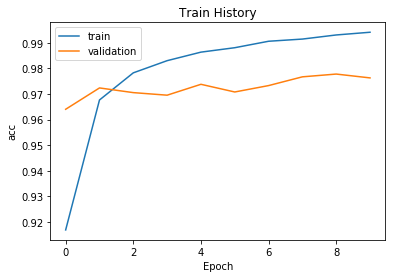

In [39]:
show_train_history(train_history,'acc','val_acc')

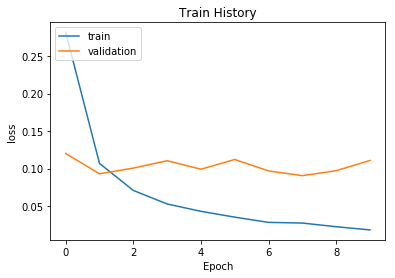

In [40]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [41]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9766
